In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Preprocessing

In [24]:
df = pd.read_csv('Advertising.csv')

In [25]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [27]:
df.shape

(200, 5)

In [28]:
df.duplicated().sum()

0

In [29]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [30]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace=True)

In [31]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Exploratory Data Analysis

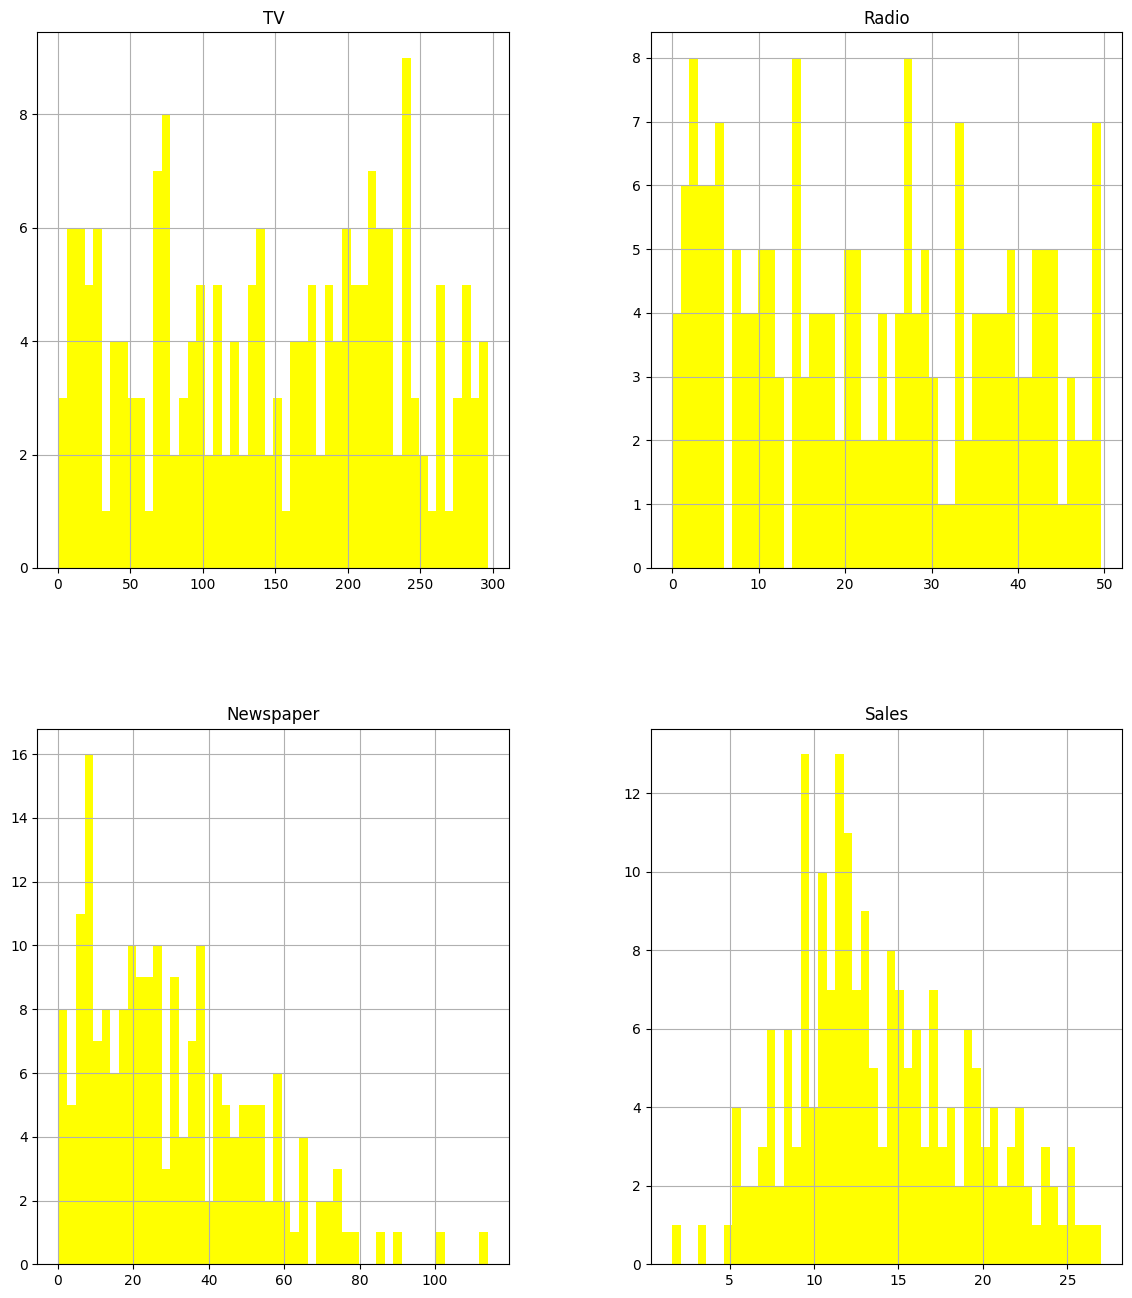

In [72]:
df.hist(figsize = (14,16), bins = 50, color='yellow')
plt.show()

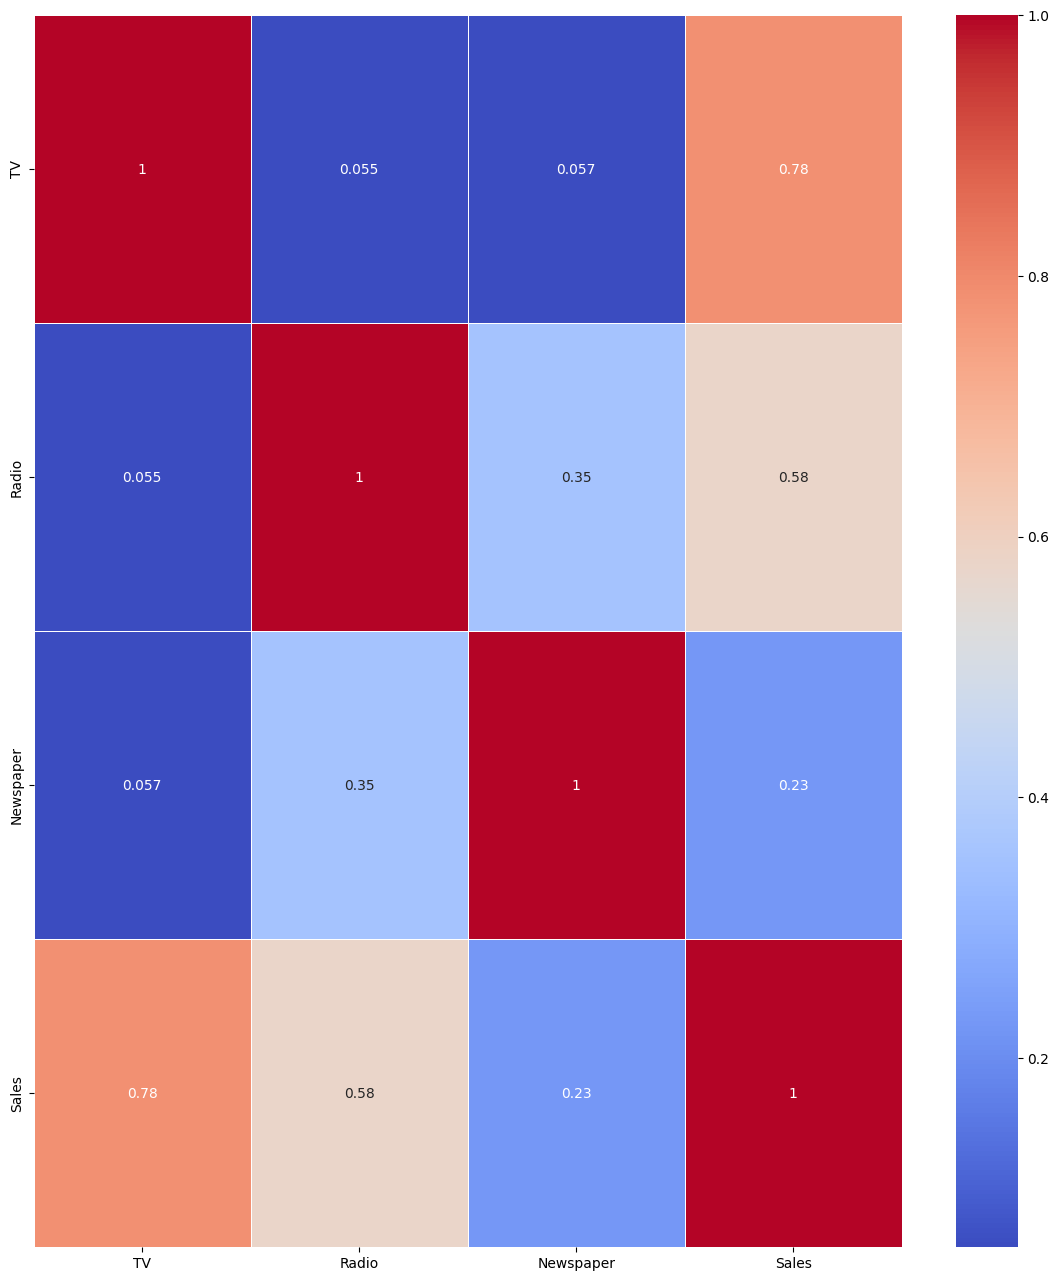

In [34]:
plt.figure(figsize = (14,16)-)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [37]:
from sklearn.utils import shuffle
X = df.drop('Sales', axis=1)
Y = df.Sales

X, Y = shuffle(X, Y, random_state=42)

In [42]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [44]:
model_sfs = RandomForestRegressor(random_state = 42)

In [45]:
sfs = SFS(model_sfs, k_features = 'best', forward = True, floating = True, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = 1, verbose = 2)


In [48]:
sfs.fit(X,Y)


[2024-08-09 17:41:31] Features: 1/3 -- score: -3.6708447094214263
[2024-08-09 17:41:33] Features: 2/3 -- score: -0.6650322071654896
[2024-08-09 17:41:36] Features: 3/3 -- score: -0.7236848868615408

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          floating=True, k_features=(1, 3),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [49]:
list(sfs.k_feature_names_)

['TV', 'Radio']

In [51]:
X = df[list(sfs.k_feature_names_)]
Y = df.Sales

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [53]:
Lin_reg_model = LinearRegression()
RF_model = RandomForestRegressor()

In [54]:
Lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [55]:
RF_model.fit(X_test, Y_test)

RandomForestRegressor()

# Model Evaluation

In [60]:
pred_l = Lin_reg_model.predict(X_test)


mse = mean_squared_error(Y_test, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, pred_l)
r2 = r2_score(Y_test, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(Y_test)] * len(Y_test)
baseline_mse = mean_squared_error(Y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 3.137948009068354
Root Mean Squared Error (RMSE): 1.7714254173033517
Mean Absolute Error (MAE): 1.4443023138227578
R-squared (R2): 0.9005833101920356
Baseline MSE: 31.563593749999995
Baseline RMSE: 5.6181486051901475


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions with the trained model
pred_r = RF_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(Y_test, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, pred_r)
r2 = r2_score(Y_test, pred_r)

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Calculate baseline metrics using the mean of the test set
baseline_pred = [np.mean(Y_test)] * len(Y_test)
baseline_mse = mean_squared_error(Y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)

# Print the baseline metrics for comparison
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')


Mean Squared Error (MSE): 0.1568375249999962
Root Mean Squared Error (RMSE): 0.3960271770977292
Mean Absolute Error (MAE): 0.31482499999999636
R-squared (R2): 0.9950310624879337
Baseline MSE: 31.563593749999995
Baseline RMSE: 5.6181486051901475


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import numpy as np

model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}
scores_mse = cross_val_score(model, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, X_train, Y_train, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, X_train, Y_train, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(X_train, Y_train)

pred = model.predict(X_test)

mse_test = mean_squared_error(Y_test, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(Y_test, pred)
r2_test = r2_score(Y_test, pred)

print('\nTest Set Performance:')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')


Mean MSE: 0.711345668749999
Standard Deviation of MSE: 0.36563072345001824
Mean RMSE: 0.8186358275771239
Standard Deviation of RMSE: 0.20293114733109982
Mean MAE: 0.5779562499999995
Standard Deviation of MAE: 0.06410603276993457
Mean R-squared: 0.9712421214082987
Standard Deviation of R-squared: 0.012496485195492053

Test Set Performance:
Test Set MSE: 0.42897727499999805
Test Set RMSE: 0.6549635676890724
Test Set MAE: 0.5391249999999967
Test Set R-squared: 0.9864091117634538
